## Import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fetal_health.csv")

In [3]:
%matplotlib inline

## 1. Data Summary
### Dtypes

In [4]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

### Describe the data (mean, std, min, max, etc)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Check number of unique values in each column for encoded categorical data

If we do not count features that have less than 10 unique values as numerical data, then we can see that there some features that seem to be numerical but actually can be consider categorical:
- severe_decelerations: 2 unique values
- prolongued_decelerations: 6 unique values
- histogram_number_of_zeroes: 9 unique values
- histogram_tendency: 3 unique values

In [6]:
numerical_features = []
categorical_features = []

for col in df.columns:
    col_data = df[col]
    unique_values = col_data.unique()

    # filter out categorical and numerical features
    if col != "fetal_health":
        if len(unique_values) <= 10:
            categorical_features.append(col)
        else:
            numerical_features.append(col)
    print(col, ": ", len(unique_values))

baseline value :  48
accelerations :  20
fetal_movement :  102
uterine_contractions :  16
light_decelerations :  16
severe_decelerations :  2
prolongued_decelerations :  6
abnormal_short_term_variability :  75
mean_value_of_short_term_variability :  57
percentage_of_time_with_abnormal_long_term_variability :  87
mean_value_of_long_term_variability :  249
histogram_width :  154
histogram_min :  109
histogram_max :  86
histogram_number_of_peaks :  18
histogram_number_of_zeroes :  9
histogram_mode :  88
histogram_mean :  103
histogram_median :  95
histogram_variance :  133
histogram_tendency :  3
fetal_health :  3


### Heatmap of Correlation

<Axes: >

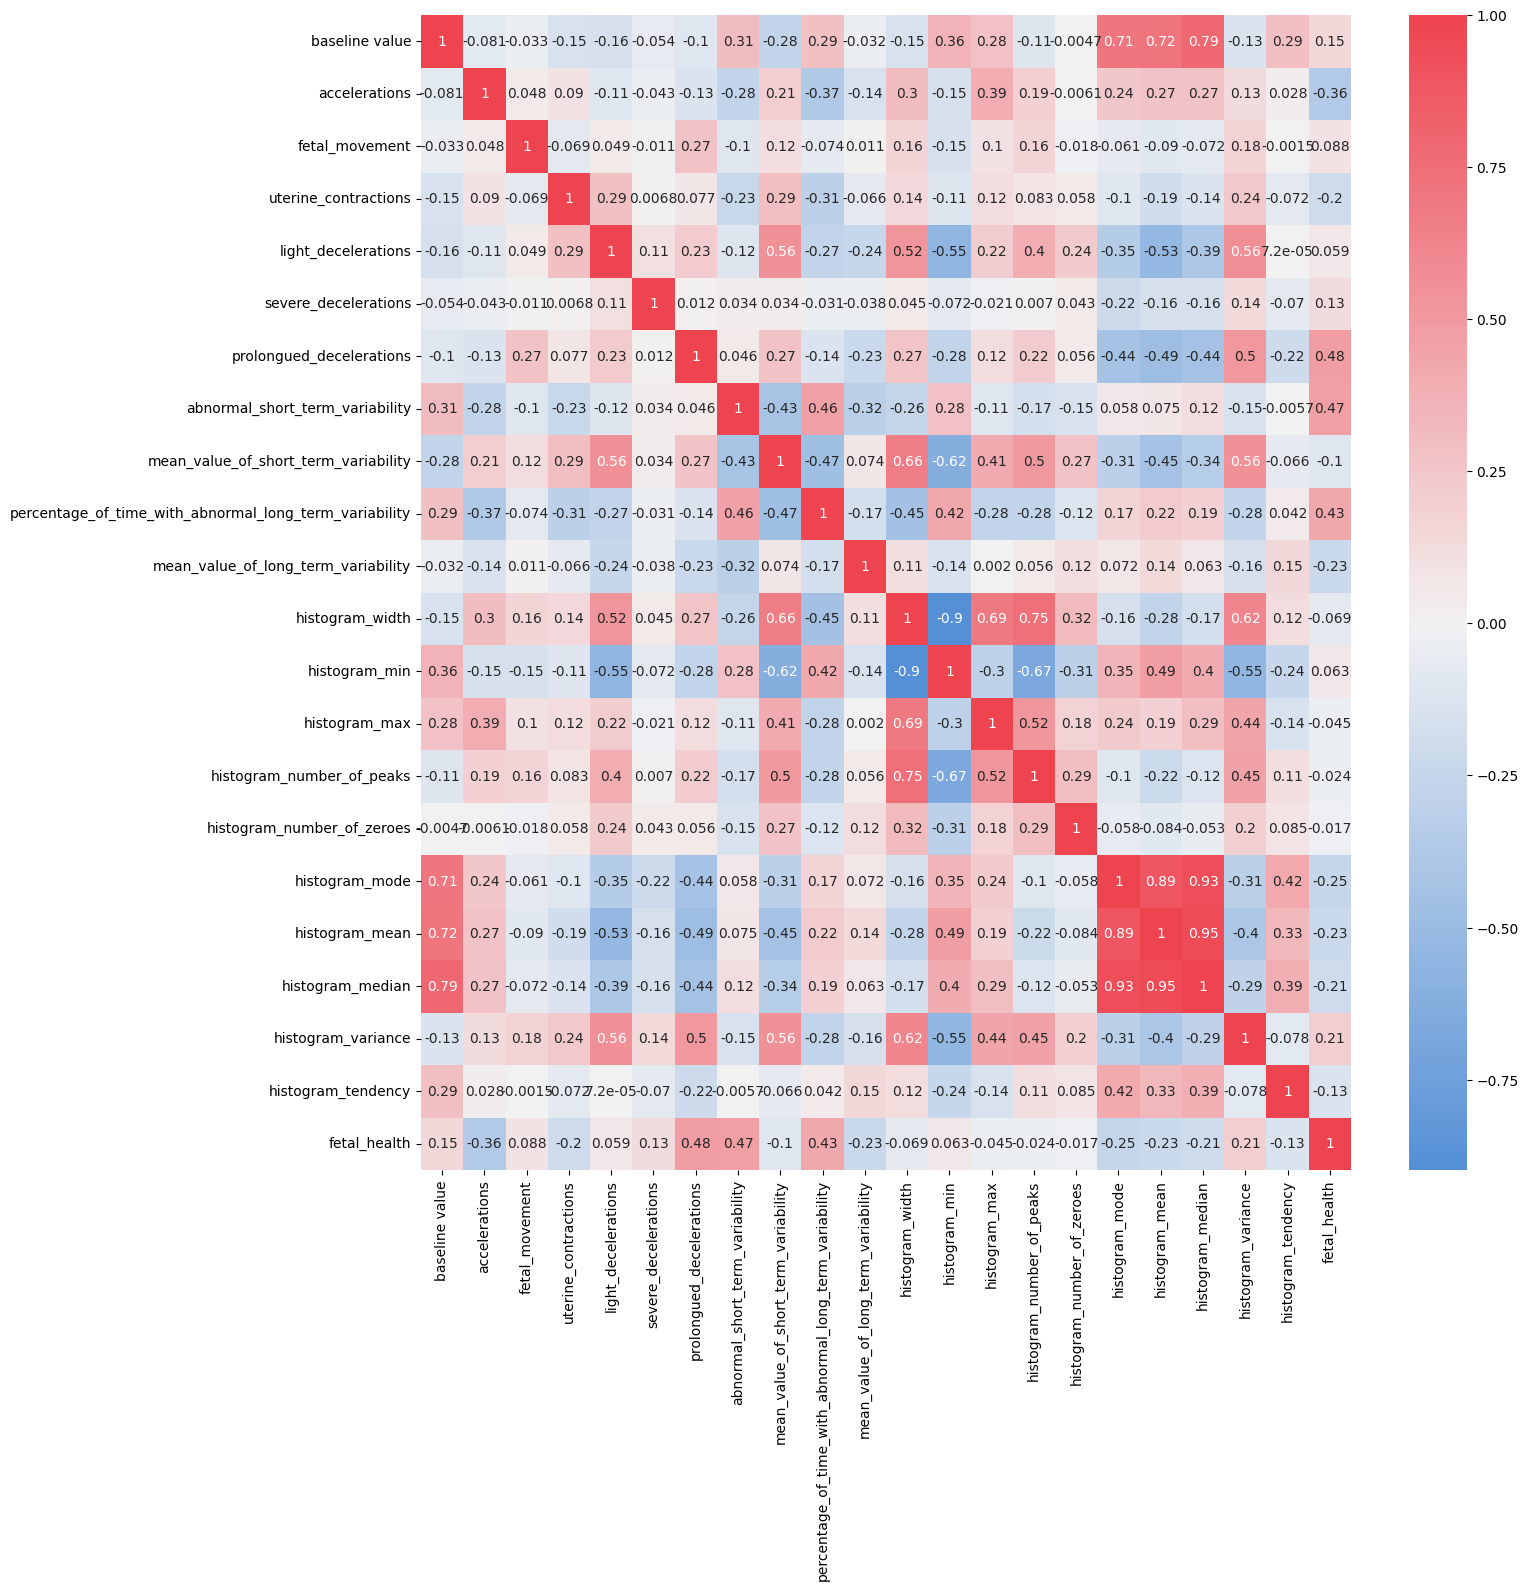

In [7]:
corrmat = df.corr()
plt.figure(figsize=(15,15)) 

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

## 2. Data distribution

In the heatmap above, we just interest in the strong relationship features with **fetal_health** feature. This would be **prolongued_decelerations, accelerations, abnormal_short_term_variability, percentage_of_time_with_abnormal_long_term_variability**

In [8]:
print("Number of numerical features: ", len(numerical_features))
print("Number of categorical features: ", len(categorical_features))
print("----------------------------")
print("Numerical features: ", numerical_features)
print("----------------------------")
print("Categorical features: ", categorical_features)

Number of numerical features:  17
Number of categorical features:  4
----------------------------
Numerical features:  ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance']
----------------------------
Categorical features:  ['severe_decelerations', 'prolongued_decelerations', 'histogram_number_of_zeroes', 'histogram_tendency']


### Categorical Data

For categorical data, we use count plot to show the distribution of categorical features between each type of fetal health.  
  
From the plots, we can see there are some interesting features in the distribution. For **prolongued_deccelaration** the fetal health of type 3 generally distribute more to the right instead for type 1 and 2 most distribute to the left.

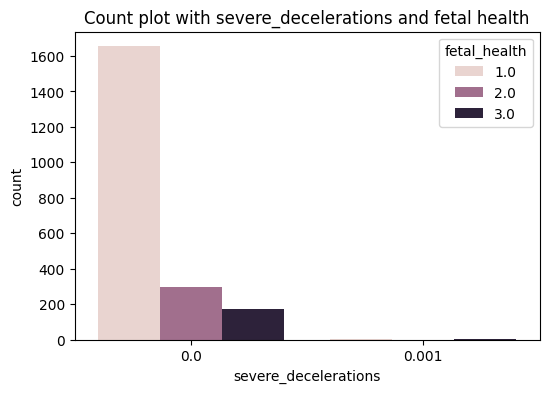

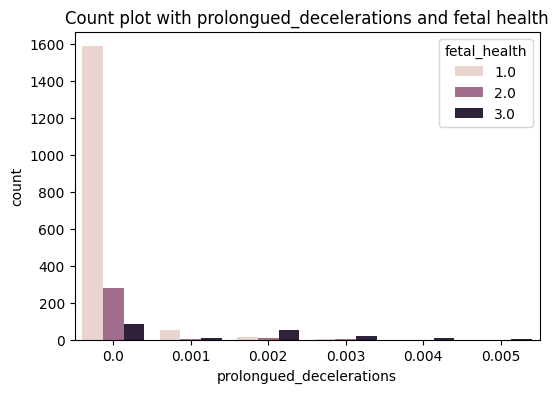

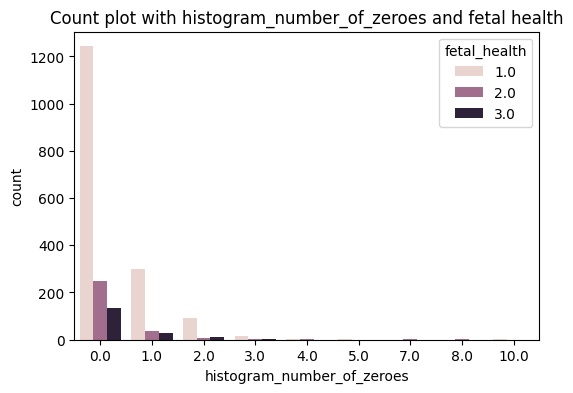

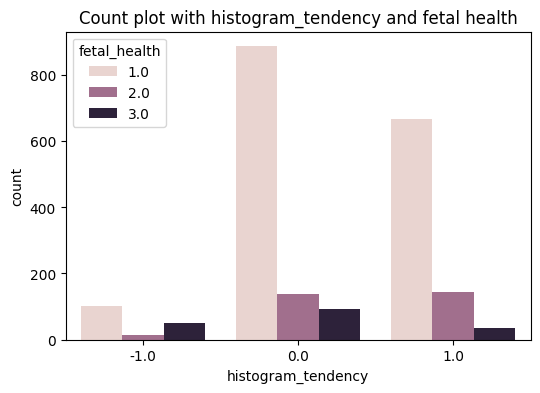

In [9]:
for i in range(len(categorical_features)):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=categorical_features[i], hue="fetal_health")
    plt.title(f"Count plot with {categorical_features[i]} and fetal health")
    plt.show()

## Numerical Data

We plot numerical data distribution here to see the abnormality and patterns. Generally we use histogram plot with KDE and a boxplot to detect outliers in each type of fetal health.  

From the plots, we can see some interesting features like **accelerations, abnormal_short_term_variability, percentage_of_time_with_abnormal_long_term_variability**. These are some features that in the heatmap of correlation have show to have significant relationship with fetal health type. We can also see that the distribution of these fetal health type are very different in these features as well. 

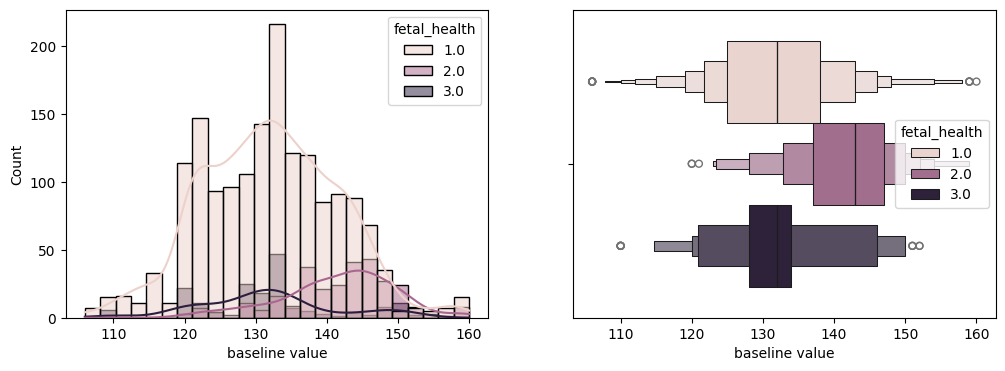

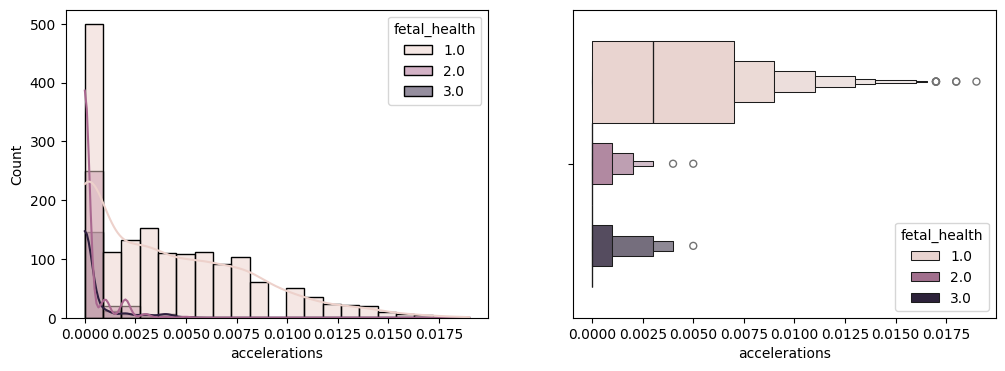

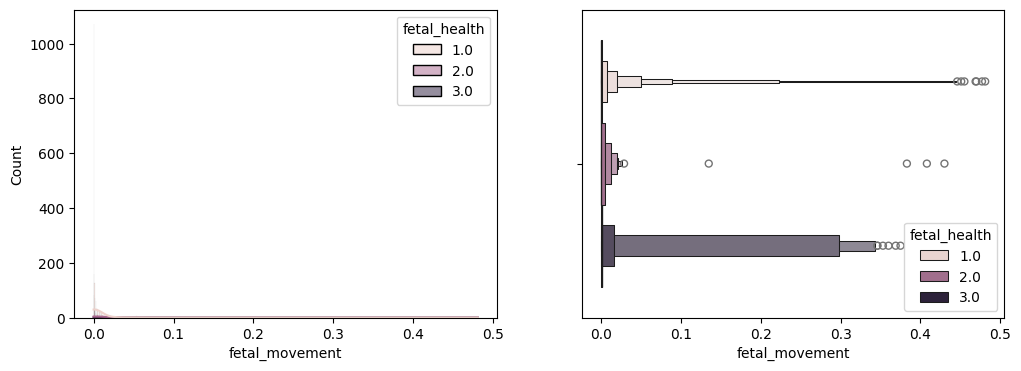

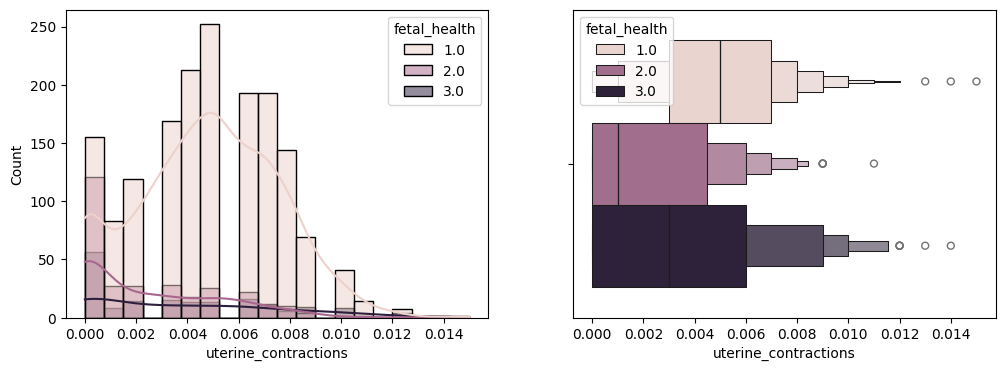

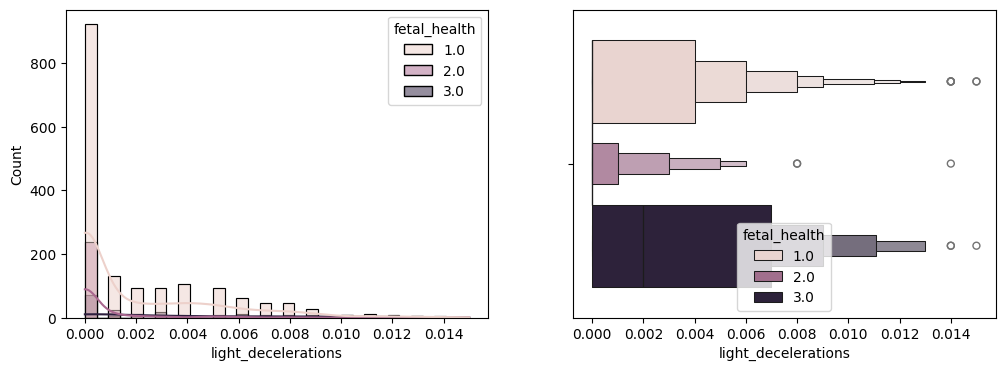

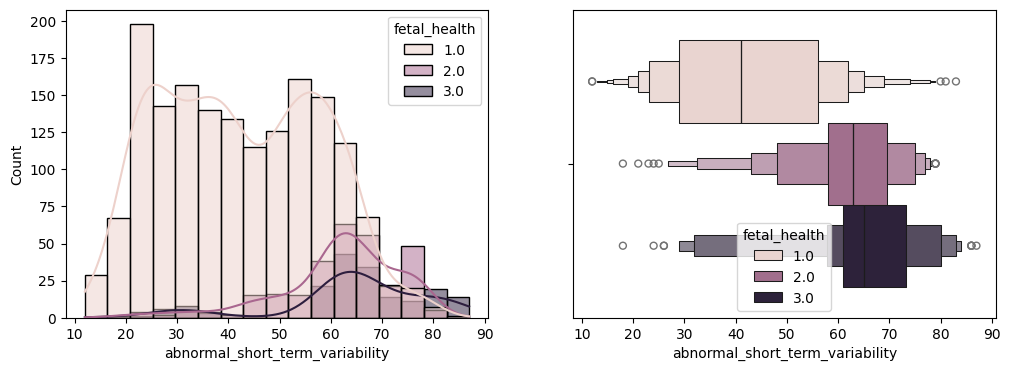

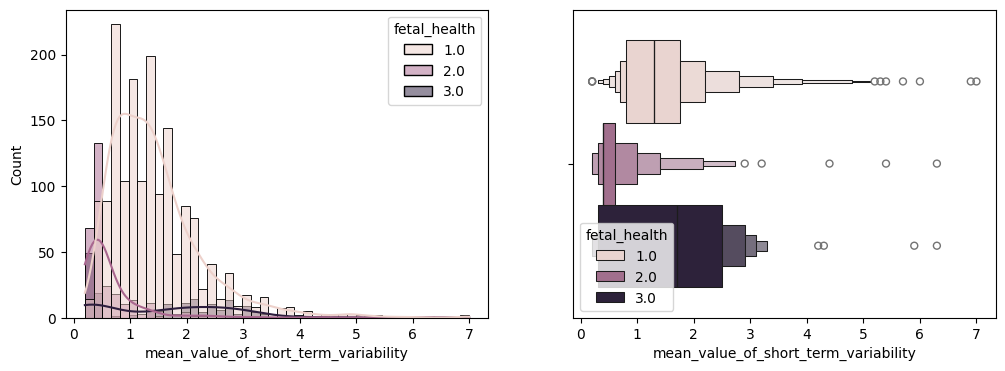

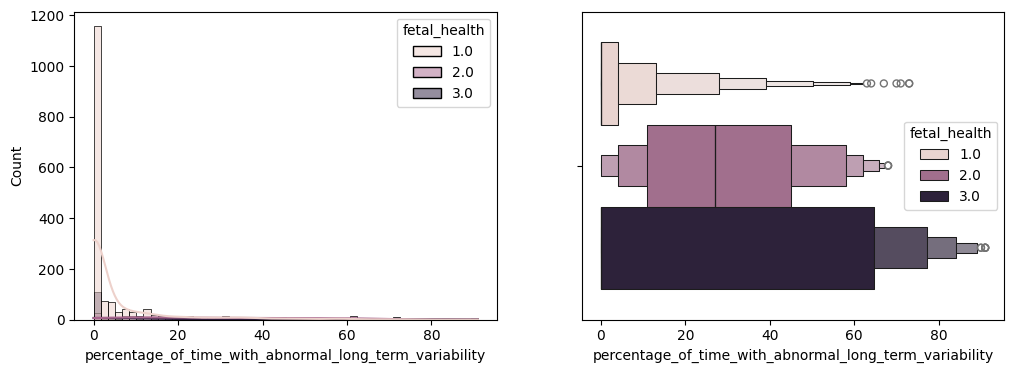

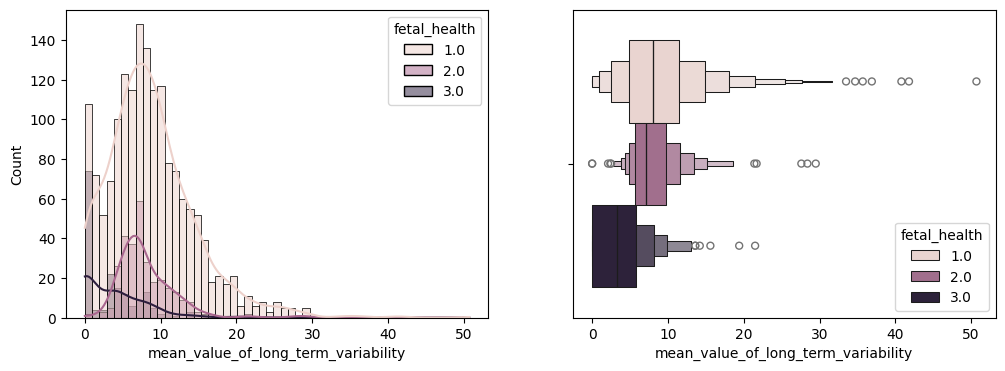

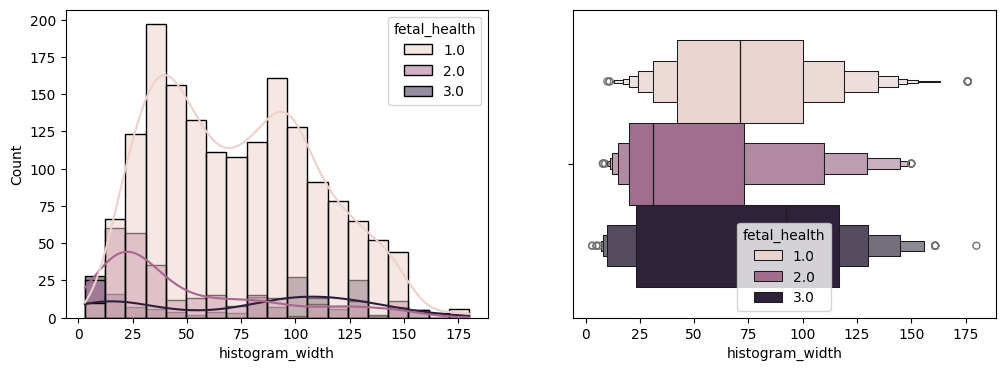

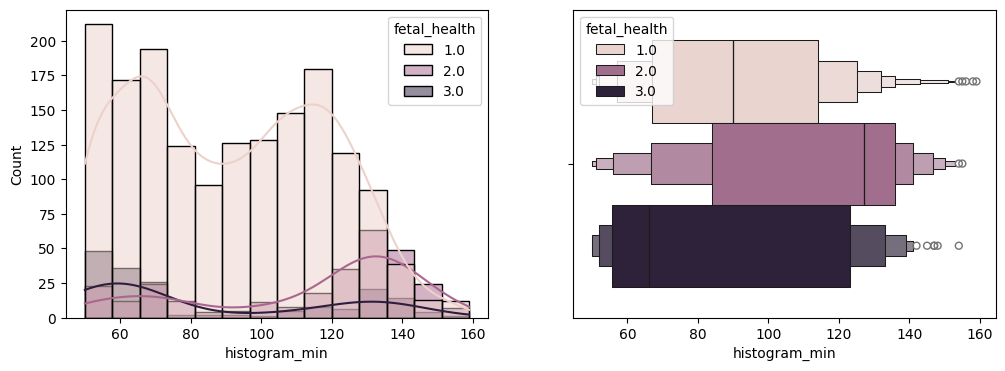

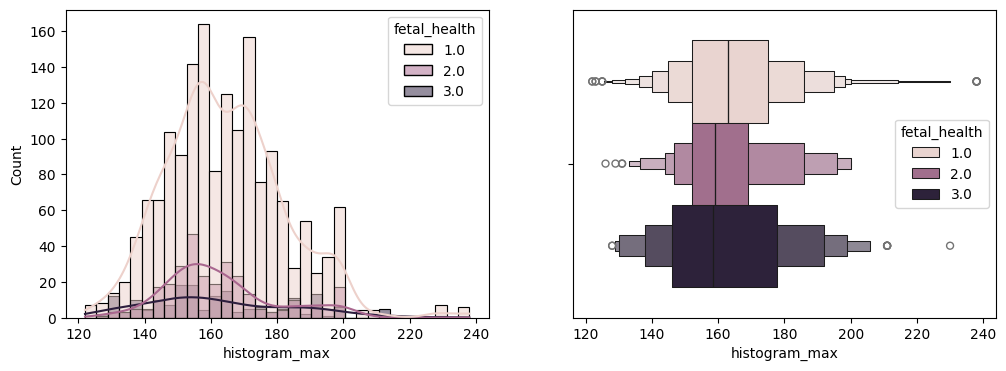

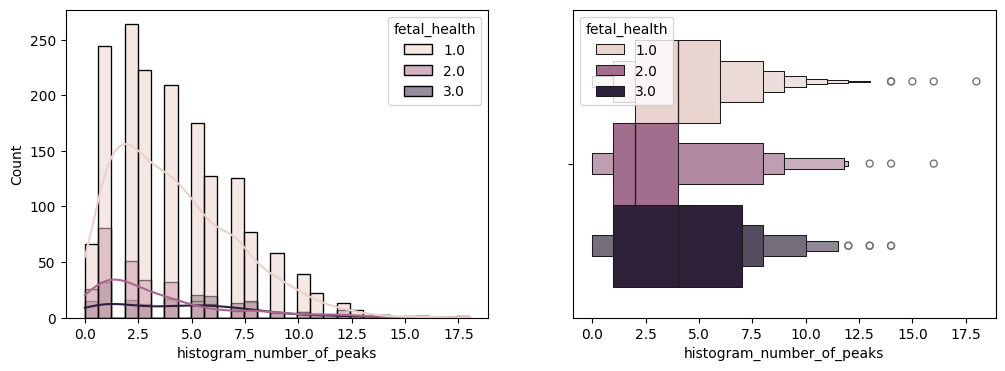

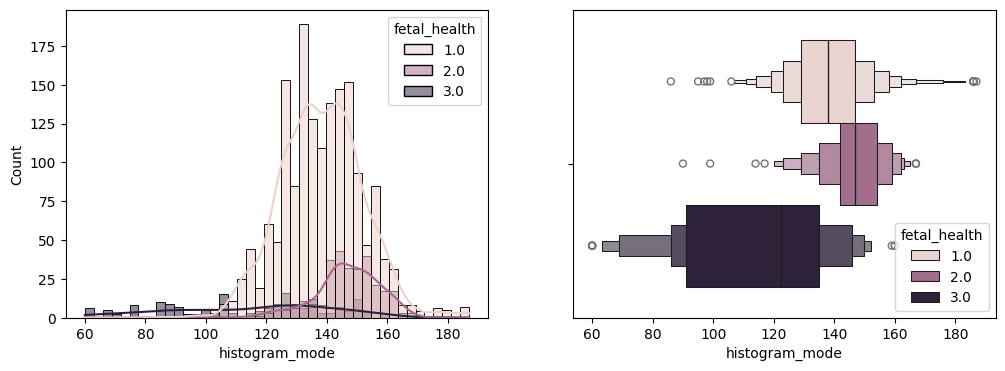

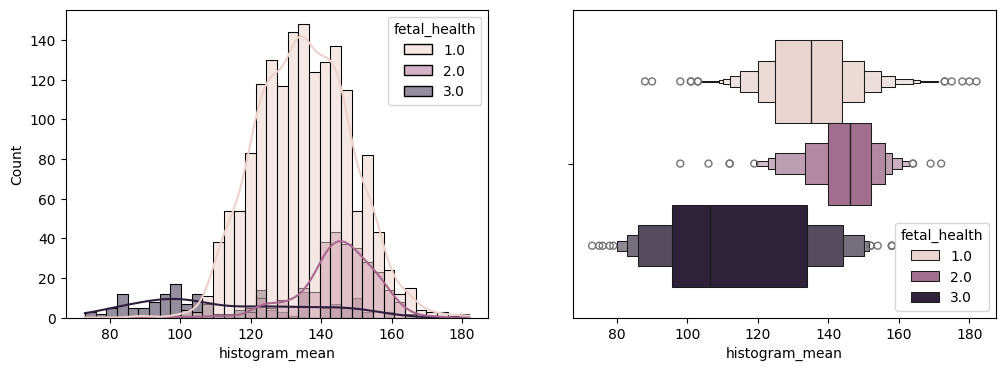

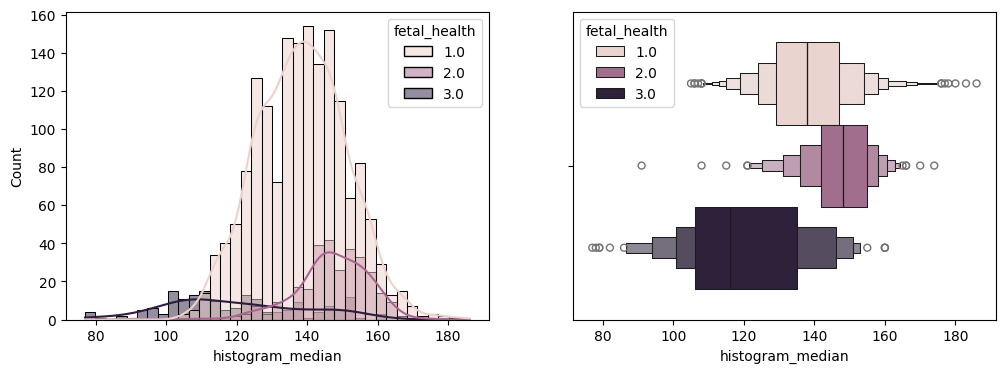

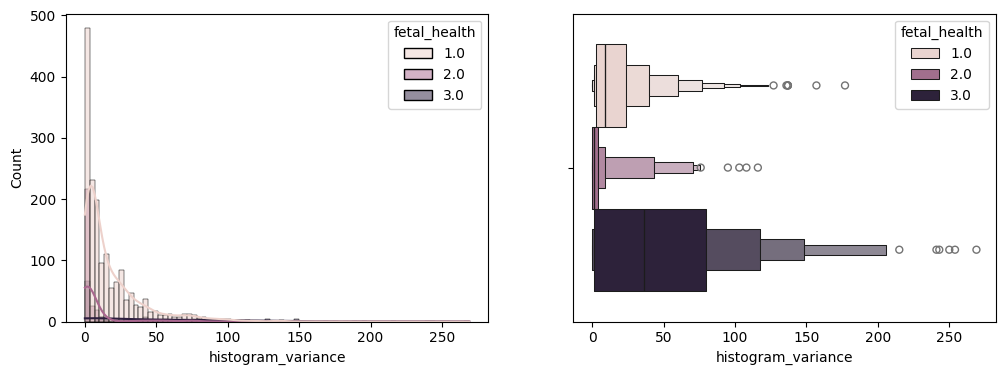

In [10]:
for i in range(len(numerical_features)):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(ax=axs[0], data=df, x=numerical_features[i], hue="fetal_health", kde=True)
    sns.boxenplot(ax=axs[1], data=df, x=numerical_features[i], hue="fetal_health")
    plt.show()